<a href="https://colab.research.google.com/github/Abhirrami/sdc/blob/main/SDC(22).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# ✅ Install dependencies
!pip install -q langchain langchain-community transformers accelerate einops

# ✅ Imports
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
from langchain_community.llms import HuggingFacePipeline
from langchain.memory import ConversationBufferMemory
from langchain.chains import ConversationChain

# ✅ Use a public, fast model (no token required)
model_id = "google/flan-t5-large"

# Load model + tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

# Build HF pipeline for text generation
pipe = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    temperature=0.7,
    do_sample=True
)

# Wrap in LangChain's LLM interface
llm = HuggingFacePipeline(pipeline=pipe)

# Add memory so the chatbot can remember previous messages
memory = ConversationBufferMemory()

# Build the conversation chain
conversation = ConversationChain(
    llm=llm,
    memory=memory,
    verbose=False
)

# ✅ Start chatbot loop
print("🤖 Chatbot is ready! Type 'exit' to quit.\n")

while True:
    user_input = input("You: ")
    if user_input.lower() in ["exit", "quit"]:
        break
    response = conversation.predict(input=user_input)
    print(f"Bot: {response}")


Device set to use cpu


🤖 Chatbot is ready! Type 'exit' to quit.

You: hi
Bot: hello
You: list out the seven wonders in the world?
Bot: yes
You: list out the seven wonders in the world
Bot: not as i can not see the list
You: who are you
Bot: AI is an artificial intelligence system
You: who is albert einstein?
Bot: albert einstein is a german physicist
You: What was his most famous equation?
Bot: albert einsteins equation is the Einstein-Fisher equation
You: exit


In [5]:
# ✅ Install required packages
!pip install -q transformers gradio langchain langchain-community

# ✅ Imports
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
import gradio as gr

# ✅ Load the summarization model
model_id = "google/pegasus-xsum"

tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)

summarizer = pipeline("summarization", model=model, tokenizer=tokenizer)

# ✅ Define summarization function
def summarize_article(article_text):
    if not article_text.strip():
        return "Please enter a news article."
    summary = summarizer(article_text, max_length=100, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# ✅ Launch Gradio UI
interface = gr.Interface(
    fn=summarize_article,
    inputs=gr.Textbox(lines=15, label="Paste News Article Here"),
    outputs=gr.Textbox(label="Summary"),
    title="📰 News Summarizer (No OpenAI)",
    description="Enter a news article and get a concise summary using Pegasus."
)

interface.launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.4/11.4 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.4/62.4 kB 6.4 MB/s eta 0:00:00


tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://bf888b6a576b965a05.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [7]:
# Install required packages
!pip install -q langchain langchain-community transformers gradio

# Imports
from transformers import MarianMTModel, MarianTokenizer
import gradio as gr

# Function to load MarianMT for translation (Hugging Face)
def load_translation_model(src_lang, tgt_lang):
    model_name = f'Helsinki-NLP/opus-mt-{src_lang}-{tgt_lang}'
    model = MarianMTModel.from_pretrained(model_name)
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    return model, tokenizer

# Translation function
def translate_text(text, src_lang, tgt_lang):
    model, tokenizer = load_translation_model(src_lang, tgt_lang)

    # Tokenize and translate
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
    translated = model.generate(**inputs)

    # Decode translation
    translated_text = tokenizer.decode(translated[0], skip_special_tokens=True)
    return translated_text

# Gradio interface
def translator_interface(text, src_lang, tgt_lang):
    return translate_text(text, src_lang, tgt_lang)

# Set up Gradio interface
gr.Interface(
    fn=translator_interface,
    inputs=[
        gr.Textbox(lines=4, label="Enter Text"),
        gr.Dropdown(["en", "fr", "de", "es", "it", "pt", "ru"], label="Source Language"),
        gr.Dropdown(["en", "fr", "de", "es", "it", "pt", "ru"], label="Target Language")
    ],
    outputs=gr.Textbox(label="Translated Text"),
    title="Multilingual Translator (LangChain)",
    description="Enter text in one language, select the source and target languages, and get real-time translations."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ff433f2b2675ae955e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [8]:
# Install necessary libraries
!pip install -q transformers gradio langchain langchain-community

# Imports
from transformers import pipeline
import gradio as gr

# Define a Hugging Face pipeline for Named Entity Recognition (NER) to extract skills/keywords
ner_pipeline = pipeline("ner", model="dbmdz/bert-large-cased-finetuned-conll03-english", tokenizer="dbmdz/bert-large-cased-finetuned-conll03-english")

# Function to analyze and extract key information from resume text
def analyze_resume(resume_text):
    # Extract Named Entities (e.g., skills, locations, organization names)
    entities = ner_pipeline(resume_text)
    skills = [entity['word'] for entity in entities if entity['entity'] == 'I-ORG' or entity['entity'] == 'I-LOC'] # organization or location
    important_info = {
        "Skills/Keywords": skills,
        "Word Count": len(resume_text.split()),
        "Suggestions": []
    }

    # Suggest improvements
    if important_info["Word Count"] < 300:
        important_info["Suggestions"].append("Consider expanding the content, as resumes under 300 words may appear incomplete.")

    if "Python" not in skills:
        important_info["Suggestions"].append("Consider adding Python or other relevant technical skills to improve your chances in tech roles.")

    if "Bachelor's Degree" not in resume_text and "Master's Degree" not in resume_text:
        important_info["Suggestions"].append("Make sure to include your educational qualifications, especially your degree.")

    # Return the extracted skills and suggestions
    return important_info

# Define Gradio interface
def resume_interface(resume_text):
    analysis = analyze_resume(resume_text)
    suggestions = "\n".join(analysis["Suggestions"]) if analysis["Suggestions"] else "Your resume looks great!"
    return f"Skills/Keywords: {', '.join(analysis['Skills/Keywords'])}\n\nSuggestions:\n{suggestions}"

# Create Gradio UI
gr.Interface(
    fn=resume_interface,
    inputs=gr.Textbox(lines=15, label="Enter Resume Text Here"),
    outputs=gr.Textbox(label="Analysis and Suggestions"),
    title="Resume Analyzer",
    description="Analyze your resume by entering the text. Get AI-powered insights and suggestions to improve it!"
).launch()


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1ece01c184d0196e17.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [14]:
!pip install -q transformers gradio
from transformers import pipeline
import gradio as gr

# Load Hugging Face Named Entity Recognition pipeline
ner_pipeline = pipeline("ner", grouped_entities=True, model="dslim/bert-base-NER")

# Resume Analyzer function
def analyze_resume(resume_text):
    # Extract Named Entities
    entities = ner_pipeline(resume_text)
    skills = set()
    orgs = set()
    locs = set()

    for entity in entities:
        entity_type = entity['entity_group']
        word = entity['word']
        if entity_type == "ORG":
            orgs.add(word)
        elif entity_type == "LOC":
            locs.add(word)
        elif entity_type == "MISC":
            skills.add(word)

    word_count = len(resume_text.split())

    # Suggestions logic
    suggestions = []

    if word_count < 300:
        suggestions.append("📏 Try to expand your resume. Ideal resumes have 300+ words for more detail.")

    if len(skills) < 3:
        suggestions.append("🛠️ Add more specific technical or domain-related skills.")

    if "Python" not in resume_text and "Java" not in resume_text:
        suggestions.append("👨‍💻 Highlight programming skills like Python or Java if applicable.")

    if "Bachelor" not in resume_text and "Master" not in resume_text:
        suggestions.append("🎓 Include your education details, especially degrees.")

    # Compile result
    result = f"""🧾 **Resume Summary**

**Word Count:** {word_count}
**Organizations:** {', '.join(orgs) if orgs else 'None'}
**Locations Mentioned:** {', '.join(locs) if locs else 'None'}
**Detected Skills/Keywords:** {', '.join(skills) if skills else 'None'}

💡 **Suggestions to Improve:**
{chr(10).join(suggestions) if suggestions else "✅ Your resume looks solid!"}
    """
    return result

# Gradio UI
gr.Interface(
    fn=analyze_resume,
    inputs=gr.Textbox(lines=20, label="Paste Your Resume Text"),
    outputs="text",
    title="📄 AI Resume Analyzer",
    description="Paste your resume below to get AI-generated feedback and improvement suggestions.",
).launch()


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c1c24749d803f74c64.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [13]:
!pip install -q transformers gradio
from transformers import pipeline
import gradio as gr

# Load a general-purpose QA model (can be replaced with a biomedical one like 'emilyalsentzer/Bio_ClinicalBERT' if needed)
symptom_pipeline = pipeline("question-answering", model="deepset/roberta-base-squad2")

# Medical condition mapping (simplified)
conditions_db = {
    "fever, cough, sore throat": ("Flu (Influenza)", "A contagious respiratory illness caused by influenza viruses."),
    "runny nose, sneezing, congestion": ("Common Cold", "A mild viral infection of the nose and throat."),
    "fever, fatigue, dry cough": ("COVID-19", "A viral respiratory infection caused by SARS-CoV-2."),
    "headache, nausea, sensitivity to light": ("Migraine", "A type of headache that can cause severe throbbing pain."),
    "chest pain, shortness of breath, sweating": ("Heart Attack", "A serious condition where the blood supply to the heart is blocked."),
}

# Function to analyze symptoms
def analyze_symptoms(user_input):
    user_input_lower = user_input.lower()

    # Match symptoms with known conditions (simplified logic)
    for symptoms, (condition, description) in conditions_db.items():
        match_count = sum([1 for sym in symptoms.split(', ') if sym in user_input_lower])
        if match_count >= 2:  # loose match if at least 2 symptoms match
            return f"🔍 Possible Condition: {condition}\n\n📝 Description: {description}\n\n⚠️ This is not a medical diagnosis. Please consult a healthcare professional."

    return "❗ Unable to determine a condition based on the symptoms provided.\n\nPlease rephrase or consult a healthcare provider."

# Gradio interface
gr.Interface(
    fn=analyze_symptoms,
    inputs=gr.Textbox(lines=4, placeholder="Describe your symptoms..."),
    outputs="text",
    title="🩺 AI Medical Symptom Checker",
    description="Enter your symptoms to get a possible diagnosis (for informational purposes only)."
).launch()


config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5c60c3b7392245ada9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


📈 Predicted price for 1100 sq ft house: $270000.00


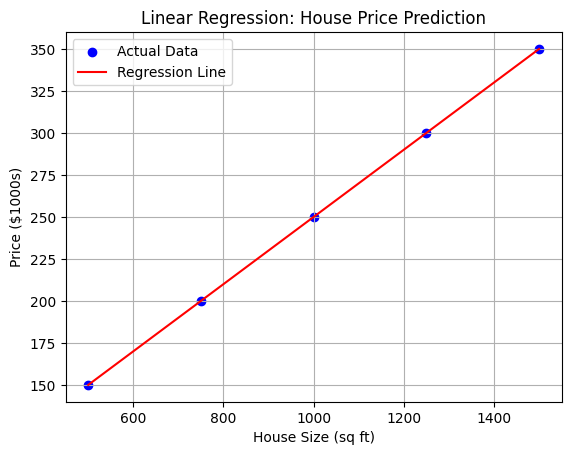

In [15]:
# Step 1: Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 2: Sample data (House size in sq ft vs Price in $1000s)
X = np.array([[500], [750], [1000], [1250], [1500]])  # House sizes (input)
y = np.array([150, 200, 250, 300, 350])               # Prices (output)

# Step 3: Create and train the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 4: Predict price for a new house size
new_size = np.array([[1100]])
predicted_price = model.predict(new_size)

print(f"📈 Predicted price for 1100 sq ft house: ${predicted_price[0]*1000:.2f}")

# Step 5: Visualize the data and regression line
plt.scatter(X, y, color='blue', label="Actual Data")
plt.plot(X, model.predict(X), color='red', label="Regression Line")
plt.xlabel("House Size (sq ft)")
plt.ylabel("Price ($1000s)")
plt.title("Linear Regression: House Price Prediction")
plt.legend()
plt.grid(True)
plt.show()


In [16]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Training data
X = np.array([[500], [750], [1000], [1250], [1500]])
y = np.array([150, 200, 250, 300, 350])

# Train the model
model = LinearRegression()
model.fit(X, y)

# Get user input
try:
    user_input = float(input("Enter the house size in square feet: "))
    user_data = np.array([[user_input]])

    # Predict
    prediction = model.predict(user_data)
    print(f"📈 Predicted price for {user_input} sq ft house: ${prediction[0] * 1000:.2f}")
except ValueError:
    print("Please enter a valid number.")


Enter the house size in square feet: 1100
📈 Predicted price for 1100.0 sq ft house: $270000.00


In [31]:
# Install required libraries
!pip install -q scikit-learn gradio

import gradio as gr
from sklearn.linear_model import LinearRegression
import numpy as np

# --- Training Sample Data (Synthetic) ---
# [Bedrooms, Bathrooms, Square Footage, House Age]
X = np.array([
    [2, 1, 800, 20],
    [3, 2, 1200, 10],
    [4, 3, 1600, 5],
    [3, 1, 1000, 15],
    [5, 4, 2500, 2],
    [2, 1, 750, 30]
])

# Prices in $1000s
y = np.array([150, 250, 350, 200, 500, 130])

# Train the model
model = LinearRegression()
model.fit(X, y)

# --- Prediction Function ---
def predict_price(bedrooms, bathrooms, sqft, age):
    input_data = np.array([[bedrooms, bathrooms, sqft, age]])
    predicted_price = model.predict(input_data)[0]
    return f"Estimated Price: ${predicted_price:.2f}K"

# --- Gradio UI ---
inputs = [
    gr.Number(label="Bedrooms", value=3),
    gr.Number(label="Bathrooms", value=2),
    gr.Number(label="Square Footage", value=1200),
    gr.Number(label="House Age (years)", value=10)
]

gr.Interface(
    fn=predict_price,
    inputs=inputs,
    outputs="text",
    title="🏡 Housing Price Predictor (Linear Regression)",
    description="Enter details about the house to get an estimated price using Linear Regression."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://53ba797a175e5206f6.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [18]:
# Step 1: Import libraries
import numpy as np
from sklearn.linear_model import LogisticRegression

# Step 2: Sample data
# X = Hours studied, y = 1 (Pass), 0 (Fail)
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1])

# Step 3: Train the logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Step 4: Get user input
try:
    hours = float(input("Enter hours studied: "))
    result = model.predict([[hours]])
    probability = model.predict_proba([[hours]])[0][1]  # Probability of passing
    print(f"\n✅ Prediction: {'Pass' if result[0] == 1 else 'Fail'}")
    print(f"📊 Confidence: {probability * 100:.2f}%")
except ValueError:
    print("Please enter a valid number.")


Enter hours studied: 10

✅ Prediction: Pass
📊 Confidence: 99.84%


In [32]:
# Install required libraries
!pip install -q scikit-learn gradio

import gradio as gr
from sklearn.linear_model import LogisticRegression
import numpy as np

# --- Sample Data ---
# [Bedrooms, Bathrooms, Square Footage, House Age]
X = np.array([
    [2, 1, 800, 20],  # Low price
    [3, 2, 1200, 10], # Medium price
    [4, 3, 1600, 5],  # High price
    [3, 1, 1000, 15], # Low price
    [5, 4, 2500, 2],  # High price
    [2, 1, 750, 30]   # Low price
])

# Categories (0 = Low, 1 = Medium, 2 = High)
y = np.array([0, 1, 2, 0, 2, 0])  # Labeling prices as "Low", "Medium", "High"

# Train the model (Logistic Regression for classification)
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X, y)

# --- Prediction Function ---
def predict_price_category(bedrooms, bathrooms, sqft, age):
    input_data = np.array([[bedrooms, bathrooms, sqft, age]])
    predicted_class = model.predict(input_data)[0]
    class_map = {0: "Low", 1: "Medium", 2: "High"}
    return f"Predicted Price Category: {class_map[predicted_class]}"

# --- Gradio UI ---
inputs = [
    gr.Number(label="Bedrooms", value=3),
    gr.Number(label="Bathrooms", value=2),
    gr.Number(label="Square Footage", value=1200),
    gr.Number(label="House Age (years)", value=10)
]

gr.Interface(
    fn=predict_price_category,
    inputs=inputs,
    outputs="text",
    title="🏡 Housing Price Category Predictor (Logistic Regression)",
    description="Enter details about the house to classify it into Low, Medium, or High price category using Logistic Regression."
).launch()


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://80d4808a411b05cf77.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [19]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Accuracy
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"✅ Model trained with accuracy: {accuracy * 100:.2f}%")

# Get user input
try:
    print("\nEnter flower measurements:")
    sepal_length = float(input("Sepal length (cm): "))
    sepal_width = float(input("Sepal width (cm): "))
    petal_length = float(input("Petal length (cm): "))
    petal_width = float(input("Petal width (cm): "))

    # Predict
    user_input = [[sepal_length, sepal_width, petal_length, petal_width]]
    prediction = model.predict(user_input)[0]
    print(f"\n🌸 Predicted Iris species: {target_names[prediction]}")

except ValueError:
    print("❌ Please enter valid numerical values.")


✅ Model trained with accuracy: 100.00%

Enter flower measurements:
Sepal length (cm): 5.1
Sepal width (cm): 3.5
Petal length (cm): 1.4
Petal width (cm): 0.2

🌸 Predicted Iris species: setosa


In [20]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Sample dataset: [Age, Estimated Salary]
X = np.array([
    [22, 15000],
    [25, 29000],
    [47, 48000],
    [52, 110000],
    [46, 22000],
    [56, 75000],
    [55, 42000],
    [60, 95000]
])

# Labels: 1 = Bought, 0 = Not Bought
y = np.array([0, 0, 1, 1, 0, 1, 0, 1])

# Standardize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=0)

# Build ANN
model = Sequential()
model.add(Dense(units=6, activation='relu', input_shape=(2,)))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))  # Output layer for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Model accuracy on test data: {accuracy * 100:.2f}%")

# User input prediction
try:
    age = float(input("\nEnter age: "))
    salary = float(input("Enter estimated salary: "))
    user_input = scaler.transform([[age, salary]])
    prediction = model.predict(user_input)
    result = "Will Buy" if prediction[0][0] > 0.5 else "Won't Buy"
    print(f"\n🧾 Prediction: {result} (Confidence: {prediction[0][0]*100:.2f}%)")
except ValueError:
    print("❌ Please enter valid numeric values.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step - accuracy: 0.5000 - loss: 0.6931
✅ Model accuracy on test data: 50.00%

Enter age: 50
Enter estimated salary: 65000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step

🧾 Prediction: Will Buy (Confidence: 50.44%)


In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# One-hot encode target labels (for 3 classes)
y_encoded = to_categorical(y)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build ANN model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(4,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(3, activation='softmax'))  # 3 output classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"✅ Model Accuracy: {accuracy * 100:.2f}%")

# Predict with user input
try:
    print("\nEnter flower measurements:")
    sl = float(input("Sepal length (cm): "))
    sw = float(input("Sepal width (cm): "))
    pl = float(input("Petal length (cm): "))
    pw = float(input("Petal width (cm): "))

    user_input = np.array([[sl, sw, pl, pw]])
    user_input_scaled = scaler.transform(user_input)
    prediction = model.predict(user_input_scaled)
    predicted_class = iris.target_names[np.argmax(prediction)]

    print(f"\n🌼 Predicted Iris species: {predicted_class} (Confidence: {np.max(prediction) * 100:.2f}%)")

except ValueError:
    print("❌ Please enter valid numerical values.")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - accuracy: 0.9333 - loss: 0.2519
✅ Model Accuracy: 93.33%

Enter flower measurements:
Sepal length (cm): 5.1
Sepal width (cm): 3.5
Petal length (cm): 1.4
Petal width (cm): 0.2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step

🌼 Predicted Iris species: setosa (Confidence: 98.44%)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 100ms/step - accuracy: 0.8641 - loss: 0.4744 - val_accuracy: 0.9759 - val_loss: 0.0769
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 94ms/step - accuracy: 0.9820 - loss: 0.0620 - val_accuracy: 0.9833 - val_loss: 0.0469
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 94ms/step - accuracy: 0.9884 - loss: 0.0385 - val_accuracy: 0.9872 - val_loss: 0.0376
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 86s 102ms/step - accuracy: 0.9907 - loss: 0.0291 - val_accuracy: 0.9881 - val_loss: 0.0374
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 78s 93ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9894 - val_loss: 0.0325
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9875 - loss: 0.0391
✅ Test Accuracy: 98.94%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step


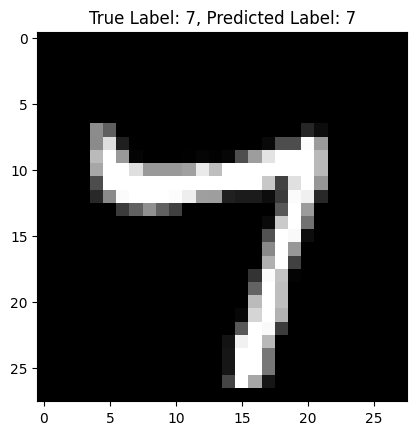

In [22]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
# Reshape data to 4D (batch_size, height, width, channels)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the target labels (digits 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the CNN model
model = Sequential()

# Convolutional layer with 32 filters, kernel size (3x3), ReLU activation function
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# Max-pooling layer to reduce spatial dimensions
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Another max-pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 3D data to 1D before passing to fully connected layer
model.add(Flatten())

# Fully connected (dense) layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Output layer with 10 neurons (one for each digit) and softmax activation
model.add(Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Step 6: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Make a prediction for a new image
import numpy as np
import matplotlib.pyplot as plt

# Choose a random image from the test set
index = np.random.randint(0, X_test.shape[0])
image = X_test[index:index+1]
true_label = np.argmax(y_test[index])

# Predict the label of the image
predicted_label = np.argmax(model.predict(image))

# Display the image and prediction
plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
plt.show()


In [24]:
import numpy as np
import gradio as gr
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Step 1: Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Step 2: Preprocess the data
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# One-hot encode the target labels (digits 0-9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Build the CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  # 10 output classes

# Step 4: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 5: Train the model
model.fit(X_train, y_train, epochs=5, batch_size=128, validation_data=(X_test, y_test))

# Step 6: Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"✅ Test Accuracy: {test_accuracy * 100:.2f}%")

# Step 7: Create the Gradio interface function
def predict_digit(image):
    # Preprocess the input image
    image = np.array(image)  # Convert the image to a numpy array
    image = image.reshape(1, 28, 28, 1)  # Reshape for the model (28x28x1)
    image = image.astype('float32') / 255  # Normalize the image

    # Predict the label using the model
    prediction = model.predict(image)
    predicted_label = np.argmax(prediction)  # Get the digit with the highest probability

    return predicted_label, prediction[0][predicted_label] * 100  # Return predicted label and confidence

# Step 8: Create the Gradio interface
gr.Interface(fn=predict_digit,
             inputs=gr.inputs.Image(shape=(28, 28), image_mode='L', source='upload', tool='editor'),
             outputs=["text", "number"],
             live=True,
             title="Handwritten Digit Classifier",
             description="Upload an image of a handwritten digit, and the model will predict it.").launch()


Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 70s 137ms/step - accuracy: 0.8576 - loss: 0.4851 - val_accuracy: 0.9822 - val_loss: 0.0598
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9805 - loss: 0.0609 - val_accuracy: 0.9869 - val_loss: 0.0426
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.9888 - loss: 0.0384 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 90ms/step - accuracy: 0.9911 - loss: 0.0278 - val_accuracy: 0.9853 - val_loss: 0.0467
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 90ms/step - accuracy: 0.9920 - loss: 0.0233 - val_accuracy: 0.9896 - val_loss: 0.0325
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9869 - loss: 0.0419
✅ Test Accuracy: 98.96%


AttributeError: module 'gradio' has no attribute 'inputs'

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 16s 72ms/step - accuracy: 0.5458 - loss: 0.6819 - val_accuracy: 0.6392 - val_loss: 0.6187
Epoch 2/2
196/196 ━━━━━━━━━━━━━━━━━━━━ 14s 69ms/step - accuracy: 0.7294 - loss: 0.5375 - val_accuracy: 0.8206 - val_loss: 0.4150
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a0fcd089751c9ee54e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [27]:
# Install dependencies
!pip install -q tensorflow gradio

# Imports
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import gradio as gr

# Constants
VOCAB_SIZE = 10000
MAX_LEN = 200

# Load dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=VOCAB_SIZE)
x_train = pad_sequences(x_train, maxlen=MAX_LEN)
x_test = pad_sequences(x_test, maxlen=MAX_LEN)

# Build LSTM model
model = Sequential([
    Embedding(VOCAB_SIZE, 64, input_length=MAX_LEN),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

# Compile and train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=2, batch_size=128, validation_split=0.2)

# Word index for encoding custom input
word_index = imdb.get_word_index()
word_index = {k: (v + 3) for k, v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2
word_index["<UNUSED>"] = 3

def encode_text(text):
    tokens = text.lower().split()
    encoded = [1]  # <START> token
    for word in tokens:
        encoded.append(word_index.get(word, 2))  # 2 is <UNK>
    return pad_sequences([encoded], maxlen=MAX_LEN)

# Gradio function
def predict_sentiment(text):
    encoded = encode_text(text)
    prediction = model.predict(encoded)[0][0]
    label = "Positive 😊" if prediction > 0.5 else "Negative 😞"
    return f"{label} (Confidence: {prediction * 100:.2f}%)"

# Gradio interface
gr.Interface(
    fn=predict_sentiment,
    inputs=gr.Textbox(lines=4, placeholder="Type a movie review here..."),
    outputs="text",
    title="LSTM Sentiment Analyzer",
    description="Enter a movie review and get a sentiment prediction using LSTM."
).launch()


Epoch 1/2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 55s 332ms/step - accuracy: 0.6655 - loss: 0.6075 - val_accuracy: 0.8672 - val_loss: 0.3246
Epoch 2/2
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 335ms/step - accuracy: 0.8982 - loss: 0.2587 - val_accuracy: 0.8740 - val_loss: 0.3016
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://f454d9ebb77f6ee85e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [28]:
# Install required packages
!pip install -q tensorflow gradio nltk

# Imports
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Layer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import gradio as gr
import numpy as np
import nltk

nltk.download("punkt")

# Sample training data
texts = [
    "The stock market crashed today due to inflation",
    "The government passed a new policy for education",
    "The player scored a hat trick in the final match",
    "Apple unveils its latest iPhone with AI features",
    "Senate debates healthcare reform bill",
    "Barcelona wins the Champions League again"
]
labels = ["business", "politics", "sports", "tech", "politics", "sports"]
label_map = {label: idx for idx, label in enumerate(set(labels))}
reverse_label_map = {idx: label for label, idx in label_map.items()}
y = np.array([label_map[label] for label in labels])

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
maxlen = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1
X = pad_sequences(sequences, maxlen=maxlen)

# Custom attention layer
class SimpleAttention(Layer):
    def __init__(self):
        super(SimpleAttention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1), initializer="random_normal")
        self.b = self.add_weight(name="attention_bias", shape=(input_shape[1], 1), initializer="zeros")
        super().build(input_shape)

    def call(self, inputs):
        score = tf.keras.backend.tanh(tf.keras.backend.dot(inputs, self.W) + self.b)
        attention_weights = tf.keras.backend.softmax(score, axis=1)
        context_vector = attention_weights * inputs
        context_vector = tf.keras.backend.sum(context_vector, axis=1)
        return context_vector

# Model
input_layer = Input(shape=(maxlen,))
embedding = Embedding(input_dim=vocab_size, output_dim=64)(input_layer)
lstm = Bidirectional(LSTM(64, return_sequences=True))(embedding)
attention = SimpleAttention()(lstm)
output = Dense(len(label_map), activation='softmax')(attention)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train
model.fit(X, y, epochs=10, verbose=0)

# Prediction function
def classify_news(text):
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=maxlen)
    prediction = model.predict(padded)[0]
    predicted_label = reverse_label_map[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return f"Predicted category: {predicted_label.title()} ({confidence:.2f}%)"

# Gradio UI
gr.Interface(
    fn=classify_news,
    inputs=gr.Textbox(lines=3, placeholder="Enter a news headline..."),
    outputs="text",
    title="News Category Classifier (CAN-style)",
    description="A simple attention-based neural network that classifies news headlines into categories."
).launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d5a61b1d4273aa0983.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [30]:
# Install dependencies
!pip install -q gradio tensorflow nltk

import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, Bidirectional, Layer
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import gradio as gr
import nltk

nltk.download("punkt")

# Sample training data
texts = [
    "AI is transforming the technology industry",
    "The economy is facing inflation pressures",
    "The team won the championship this year",
    "Google introduces new hardware products",
    "Government introduces new tax reform",
    "The player scored a record number of goals"
]
labels = ["tech", "business", "sports", "tech", "politics", "sports"]
label_map = {label: idx for idx, label in enumerate(set(labels))}
reverse_label_map = {idx: label for label, idx in label_map.items()}
y = np.array([label_map[label] for label in labels])

# Tokenize
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
maxlen = max(len(seq) for seq in sequences)
vocab_size = len(tokenizer.word_index) + 1
X = pad_sequences(sequences, maxlen=maxlen)

# Simple attention layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="random_normal", trainable=True)
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros", trainable=True)
        super().build(input_shape)

    def call(self, x):
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x, self.W) + self.b)
        a = tf.keras.backend.softmax(e, axis=1)
        output = x * a
        return tf.keras.backend.sum(output, axis=1)

# Build model
input_layer = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 64)(input_layer)
lstm_layer = Bidirectional(LSTM(64, return_sequences=True))(embedding_layer)
attention_layer = Attention()(lstm_layer)
output_layer = Dense(len(label_map), activation='softmax')(attention_layer)

model = Model(inputs=input_layer, outputs=output_layer)
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train model
model.fit(X, y, epochs=10, verbose=1)

# Inference function
def classify_news(text):
    seq = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(seq, maxlen=maxlen)
    prediction = model.predict(padded)[0]
    predicted_label = reverse_label_map[np.argmax(prediction)]
    confidence = np.max(prediction) * 100
    return f"Predicted Category: {predicted_label.capitalize()} ({confidence:.2f}%)"

# Gradio UI
gr.Interface(
    fn=classify_news,
    inputs=gr.Textbox(lines=3, placeholder="Enter a news headline here..."),
    outputs="text",
    title="🧠 (CAN) News Category Classifier with Attention",
    description="Enter a news headline, and the model will classify it into a category like tech, politics, business, or sports using LSTM with attention."
).launch()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.5000 - loss: 1.3826
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step - accuracy: 0.6667 - loss: 1.3753
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6667 - loss: 1.3679
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.6667 - loss: 1.3603
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step - accuracy: 0.6667 - loss: 1.3524
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.6667 - loss: 1.3440
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 309ms/step - accuracy: 0.6667 - loss: 1.3351
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.6667 - loss: 1.3256
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.6667 - loss: 1.3152
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 0.6667 - loss: 1.3041
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you 

In [ ]:
!pip install -U langchain langchain-community gradio transformers

from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.chains import LLMChain
from transformers import pipeline
import gradio as gr

# Load two different HuggingFace models
pipe1 = pipeline("text-generation", model="gpt2", max_length=100)
pipe2 = pipeline("text-generation", model="tiiuae/falcon-7b-instruct", max_length=100)

# Wrap pipelines for LangChain
llm1 = HuggingFacePipeline(pipeline=pipe1)
llm2 = HuggingFacePipeline(pipeline=pipe2)

# Define prompt
prompt = PromptTemplate(input_variables=["text"], template="Summarize this: {text}")

# Create chains
chain1 = LLMChain(prompt=prompt, llm=llm1)
chain2 = LLMChain(prompt=prompt, llm=llm2)

# Gradio function
def compare_models(text):
    out1 = chain1.run(text)
    out2 = chain2.run(text)
    return f"GPT-2 Output:\n{out1.strip()}\n\nFalcon Output:\n{out2.strip()}"

# Launch Gradio UI
gr.Interface(
    fn=compare_models,
    inputs=gr.Textbox(lines=5, label="Input Text"),
    outputs=gr.Textbox(label="Model Outputs"),
    title="LangChain with Two LLMs (Hugging Face)",
    description="Enter text to see how two different models generate summaries using LangChain."
).launch()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 49.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.1
    Uninstalling transformers-4.51.1:
      Successfully uninstalled transformers-4.51.1


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/1.05k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/17.7k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/4.48G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [1]:
!pip install gradio # Install gradio library
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import gradio as gr #Now we can import gradio

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.05, random_state=42)

def kmeans_clustering(n_clusters):
    # Apply K-Means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', alpha=0.6, edgecolors='k')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'K-Means Clustering (K={n_clusters})')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()

    # Save and return the plot
    plt.savefig("plot.png")
    plt.close()
    return "plot.png"

# Gradio Interface
interface = gr.Interface(
    fn=kmeans_clustering,
    inputs=gr.Slider(minimum=1, maximum=10, step=1, value=4, label="Number of Clusters (K)"),
    outputs="image",
    title="K-Means Clustering Visualization",
    description="Adjust the slider to change the number of clusters and visualize K-Means results."
)

interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://daef559dc74b051ec8.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [2]:
import gradio as gr

def greet(name, is_morning, temperature):
  salutation = "Good morning" if is_morning else "Good evening"
  greeting = f"{salutation} {name}. It is {temperature} degrees today"
  celsius = (temperature - 32) * 5 / 9
  return greeting, round(celsius, 2)

demo = gr.Interface(
    fn=greet,
    inputs=[
        gr.Textbox(label="Name"),
        gr.Checkbox(label="Is it morning?", value=True),
        gr.Slider(minimum=0, maximum=100, value=25, label="Temperature (Fahrenheit)")
    ],
    outputs=[
        gr.Textbox(label="Greeting"),
        gr.Number(label="Temperature (Celsius)")
    ],
    title="Hierarchical Example",
    description="This is an example of an interface with hierarchical structure"
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://5321cc950a34131a2a.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
# Install dependencies (run this in Colab or local if not installed)
!pip install -q gradio transformers torch torchvision
import gradio as gr
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch

# Load pre-trained ViT model and feature extractor
model_name = "google/vit-base-patch16-224"
model = ViTForImageClassification.from_pretrained(model_name)
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name)

# Classification function
def classify_image(img):
    # Preprocess
    inputs = feature_extractor(images=img, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    logits = outputs.logits
    predicted_class_idx = logits.argmax(-1).item()
    label = model.config.id2label[predicted_class_idx]
    return f"Predicted class: {label}"

# Gradio interface
gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Image Classifier",
    description="Upload an image and the model will classify it using a Vision Transformer (ViT)."
).launch()


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://8b48fdb5b3e20942eb.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [6]:
!pip install -q transformers gradio sentencepiece

from transformers import MarianMTModel, MarianTokenizer
import gradio as gr

# Mapping between display names and model language codes
lang_options = {
    "English": "en",
    "French": "fr",
    "German": "de",
    "Spanish": "es",
    "Russian": "ru",
    "Hindi": "hi",
    "Italian": "it",
    "Chinese": "zh",
    "Japanese": "ja"
}

# Function to load translation model dynamically
def load_translation_model(src_lang_code, tgt_lang_code):
    model_name = f"Helsinki-NLP/opus-mt-{src_lang_code}-{tgt_lang_code}"
    tokenizer = MarianTokenizer.from_pretrained(model_name)
    model = MarianMTModel.from_pretrained(model_name)
    return tokenizer, model

# Translation function
def translate_text(text, src_lang, tgt_lang):
    if src_lang == tgt_lang:
        return text

    src_code = lang_options.get(src_lang)
    tgt_code = lang_options.get(tgt_lang)

    try:
        tokenizer, model = load_translation_model(src_code, tgt_code)
        inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
        translated_tokens = model.generate(**inputs, max_length=512)
        translated_text = tokenizer.decode(translated_tokens[0], skip_special_tokens=True)
        return translated_text
    except Exception as e:
        return f"Translation failed: {str(e)}"

# Gradio Interface
gr.Interface(
    fn=translate_text,
    inputs=[
        gr.Textbox(label="Enter Text to Translate"),
        gr.Dropdown(choices=list(lang_options.keys()), label="From Language", value="English"),
        gr.Dropdown(choices=list(lang_options.keys()), label="To Language", value="French")
    ],
    outputs=gr.Textbox(label="Translated Text"),
    title="Google Translator (Hugging Face + Gradio)",
    description="Translate between multiple languages using Hugging Face MarianMT models."
).launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://c9d4e8c3ba2a6e9066.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [7]:
from transformers import pipeline
import gradio as gr

# Load summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define function to summarize input text
def summarize_text(text):
    if len(text.strip()) == 0:
        return "Please enter some text to summarize."

    summary = summarizer(text, max_length=130, min_length=30, do_sample=False)
    return summary[0]['summary_text']

# Build Gradio interface
gr.Interface(
    fn=summarize_text,
    inputs=gr.Textbox(lines=15, label="Enter Text to Summarize"),
    outputs=gr.Textbox(label="Summary"),
    title="Text Summarizer",
    description="Enter a long text or article and get a concise summary using BART model."
).launch()


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a9afbb42efe468f23b.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
